# Download any OSM Geospatial Entities with OSMnx

Author: [Geoff Boeing](https://geoffboeing.com/)

More info:

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [Documentation and install instructions](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  
This notebook provides a quick tour of using OSMnx to download any geospatial entites/objects from OpenStreetMap as a geopandas GeoDataFrame.

In [1]:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.0.0'

Use the `geometries` module to download entities, such as grocery stores, transit stops, points of interest, or building footprints, and turn them into a GeoDataFrame: [see docs](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.geometries).

To query, pass a `tags` dict where keys are OSM tags. The dict's values can be either:
  1. `True` to retrieve all OSM objects with this tag, regardless of its value
  2. a single value as a string to retrieve all OSM objects with this tag:value combination
  3. a list of string values to retrieve all OSM objects where this tag matches any of these values

Pass multiple dict key:value pairs to retrieve the union (not intersection) of these pairs.

In [2]:
# get all building footprints in some neighborhood
# `True` means retrieve any object with this tag, regardless of value
place = 'Bunker Hill, Los Angeles, California'
tags = {'building': True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(50, 45)

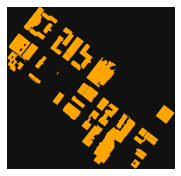

In [3]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [4]:
# get all the parks in some neighborhood
# constrain acceptable `leisure` tag values to `park`
tags = {'leisure': 'park'}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(4, 8)

In [5]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {'amenity' : True,
        'landuse' : ['retail', 'commercial'],
        'highway' : 'bus_stop'}
gdf = ox.geometries_from_place('Piedmont, California, USA', tags)
gdf.shape

(98, 43)

In [6]:
# view just the banks
gdf[gdf['amenity']=='bank'].dropna(axis=1, how='any')

,unique_id,osmid,element_type,amenity,name,geometry,brand,brand:wikidata,brand:wikipedia
7,node/2810181540,2810181540,node,bank,Citibank,POINT (-122.23256 37.82515),Citibank,Q857063,en:Citibank
86,way/276424028,276424028,way,bank,Bank of America,"POLYGON ((-122.23258 37.82491, -122.23252 37.8...",Bank of America,Q487907,en:Bank of America
89,way/285549437,285549437,way,bank,Wells Fargo,"POLYGON ((-122.23147 37.82466, -122.23134 37.8...",Wells Fargo,Q744149,en:Wells Fargo


In [7]:
# view just the bus stops
gdf[gdf['highway']=='bus_stop'].dropna(axis=1, how='any').head()

,unique_id,osmid,element_type,name,geometry,bus,highway,network,public_transport,ref,route_ref
10,node/4071030440,4071030440,node,Park Boulevard & Saint James Drive,POINT (-122.21517 37.81248),yes,bus_stop,AC Transit,platform,57544,V;33;688
13,node/5844909127,5844909127,node,Park Boulevard & Estates Drive,POINT (-122.21392 37.81363),yes,bus_stop,AC Transit,platform,54866,V;33;688
14,node/5845148873,5845148873,node,Hampton Road & Sandringham Road,POINT (-122.21492 37.81822),yes,bus_stop,AC Transit,platform,53832,33
15,node/5845152990,5845152990,node,Hampton Road & Sandringham Road,POINT (-122.21459 37.81818),yes,bus_stop,AC Transit,platform,50830,33
16,node/5845153014,5845153014,node,Hampton Road & Seaview Avenue,POINT (-122.22303 37.81763),yes,bus_stop,AC Transit,platform,53865,33
